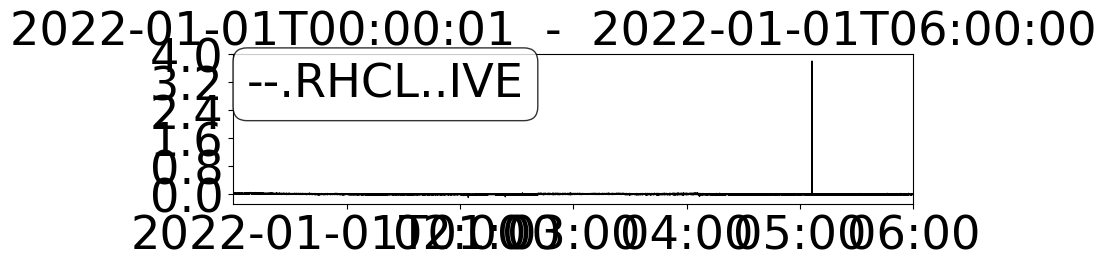

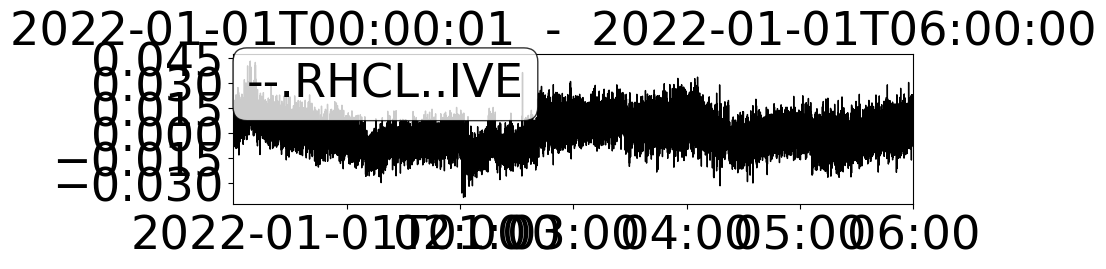

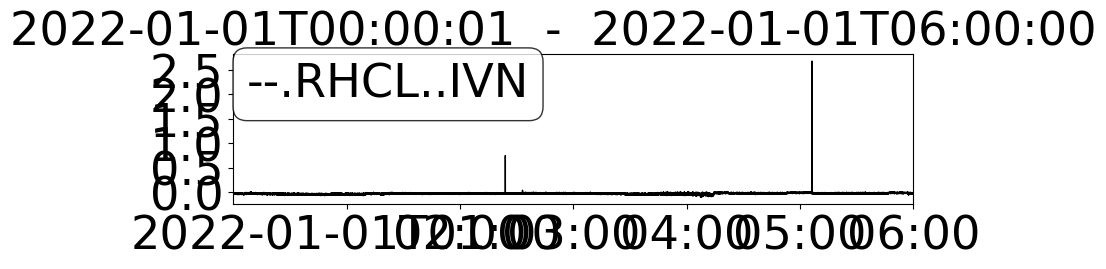

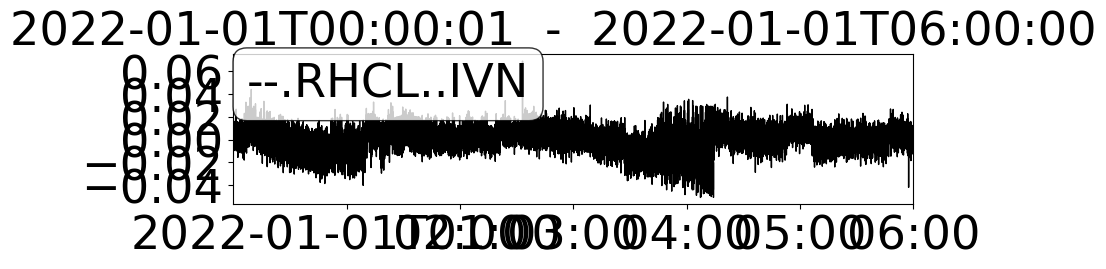

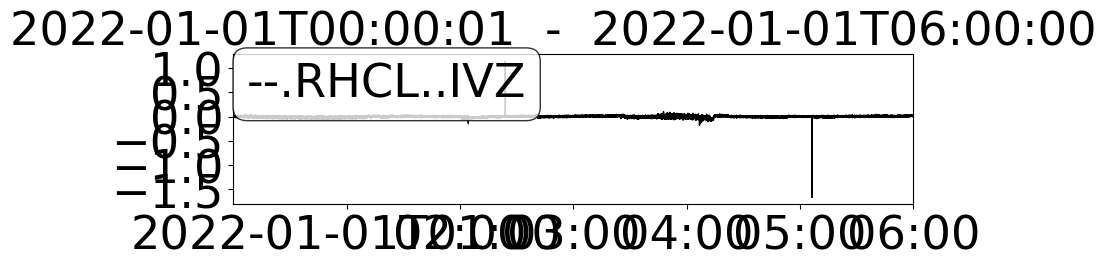

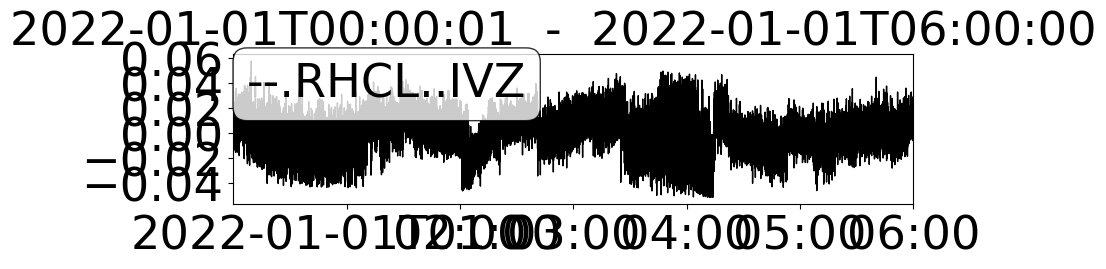

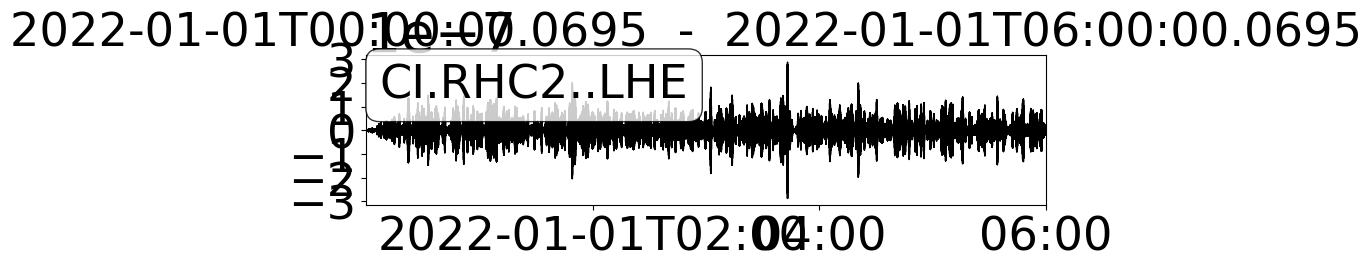

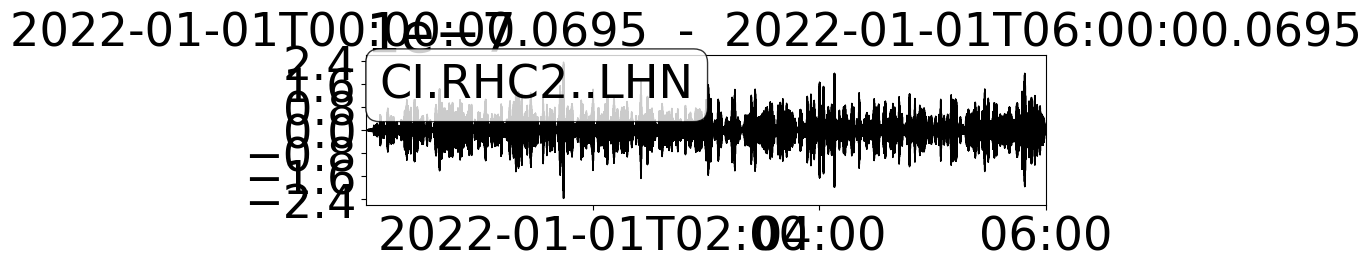

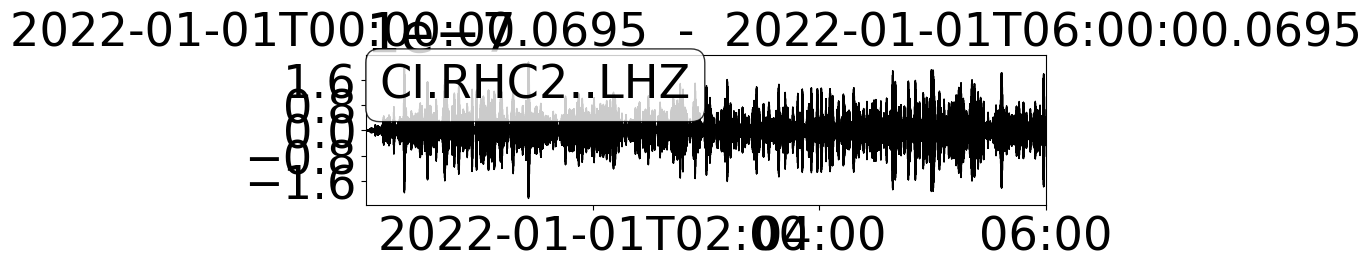

0.08899978479495678
836
0.08326212223712487
-2011
0.06688862009076856
-952


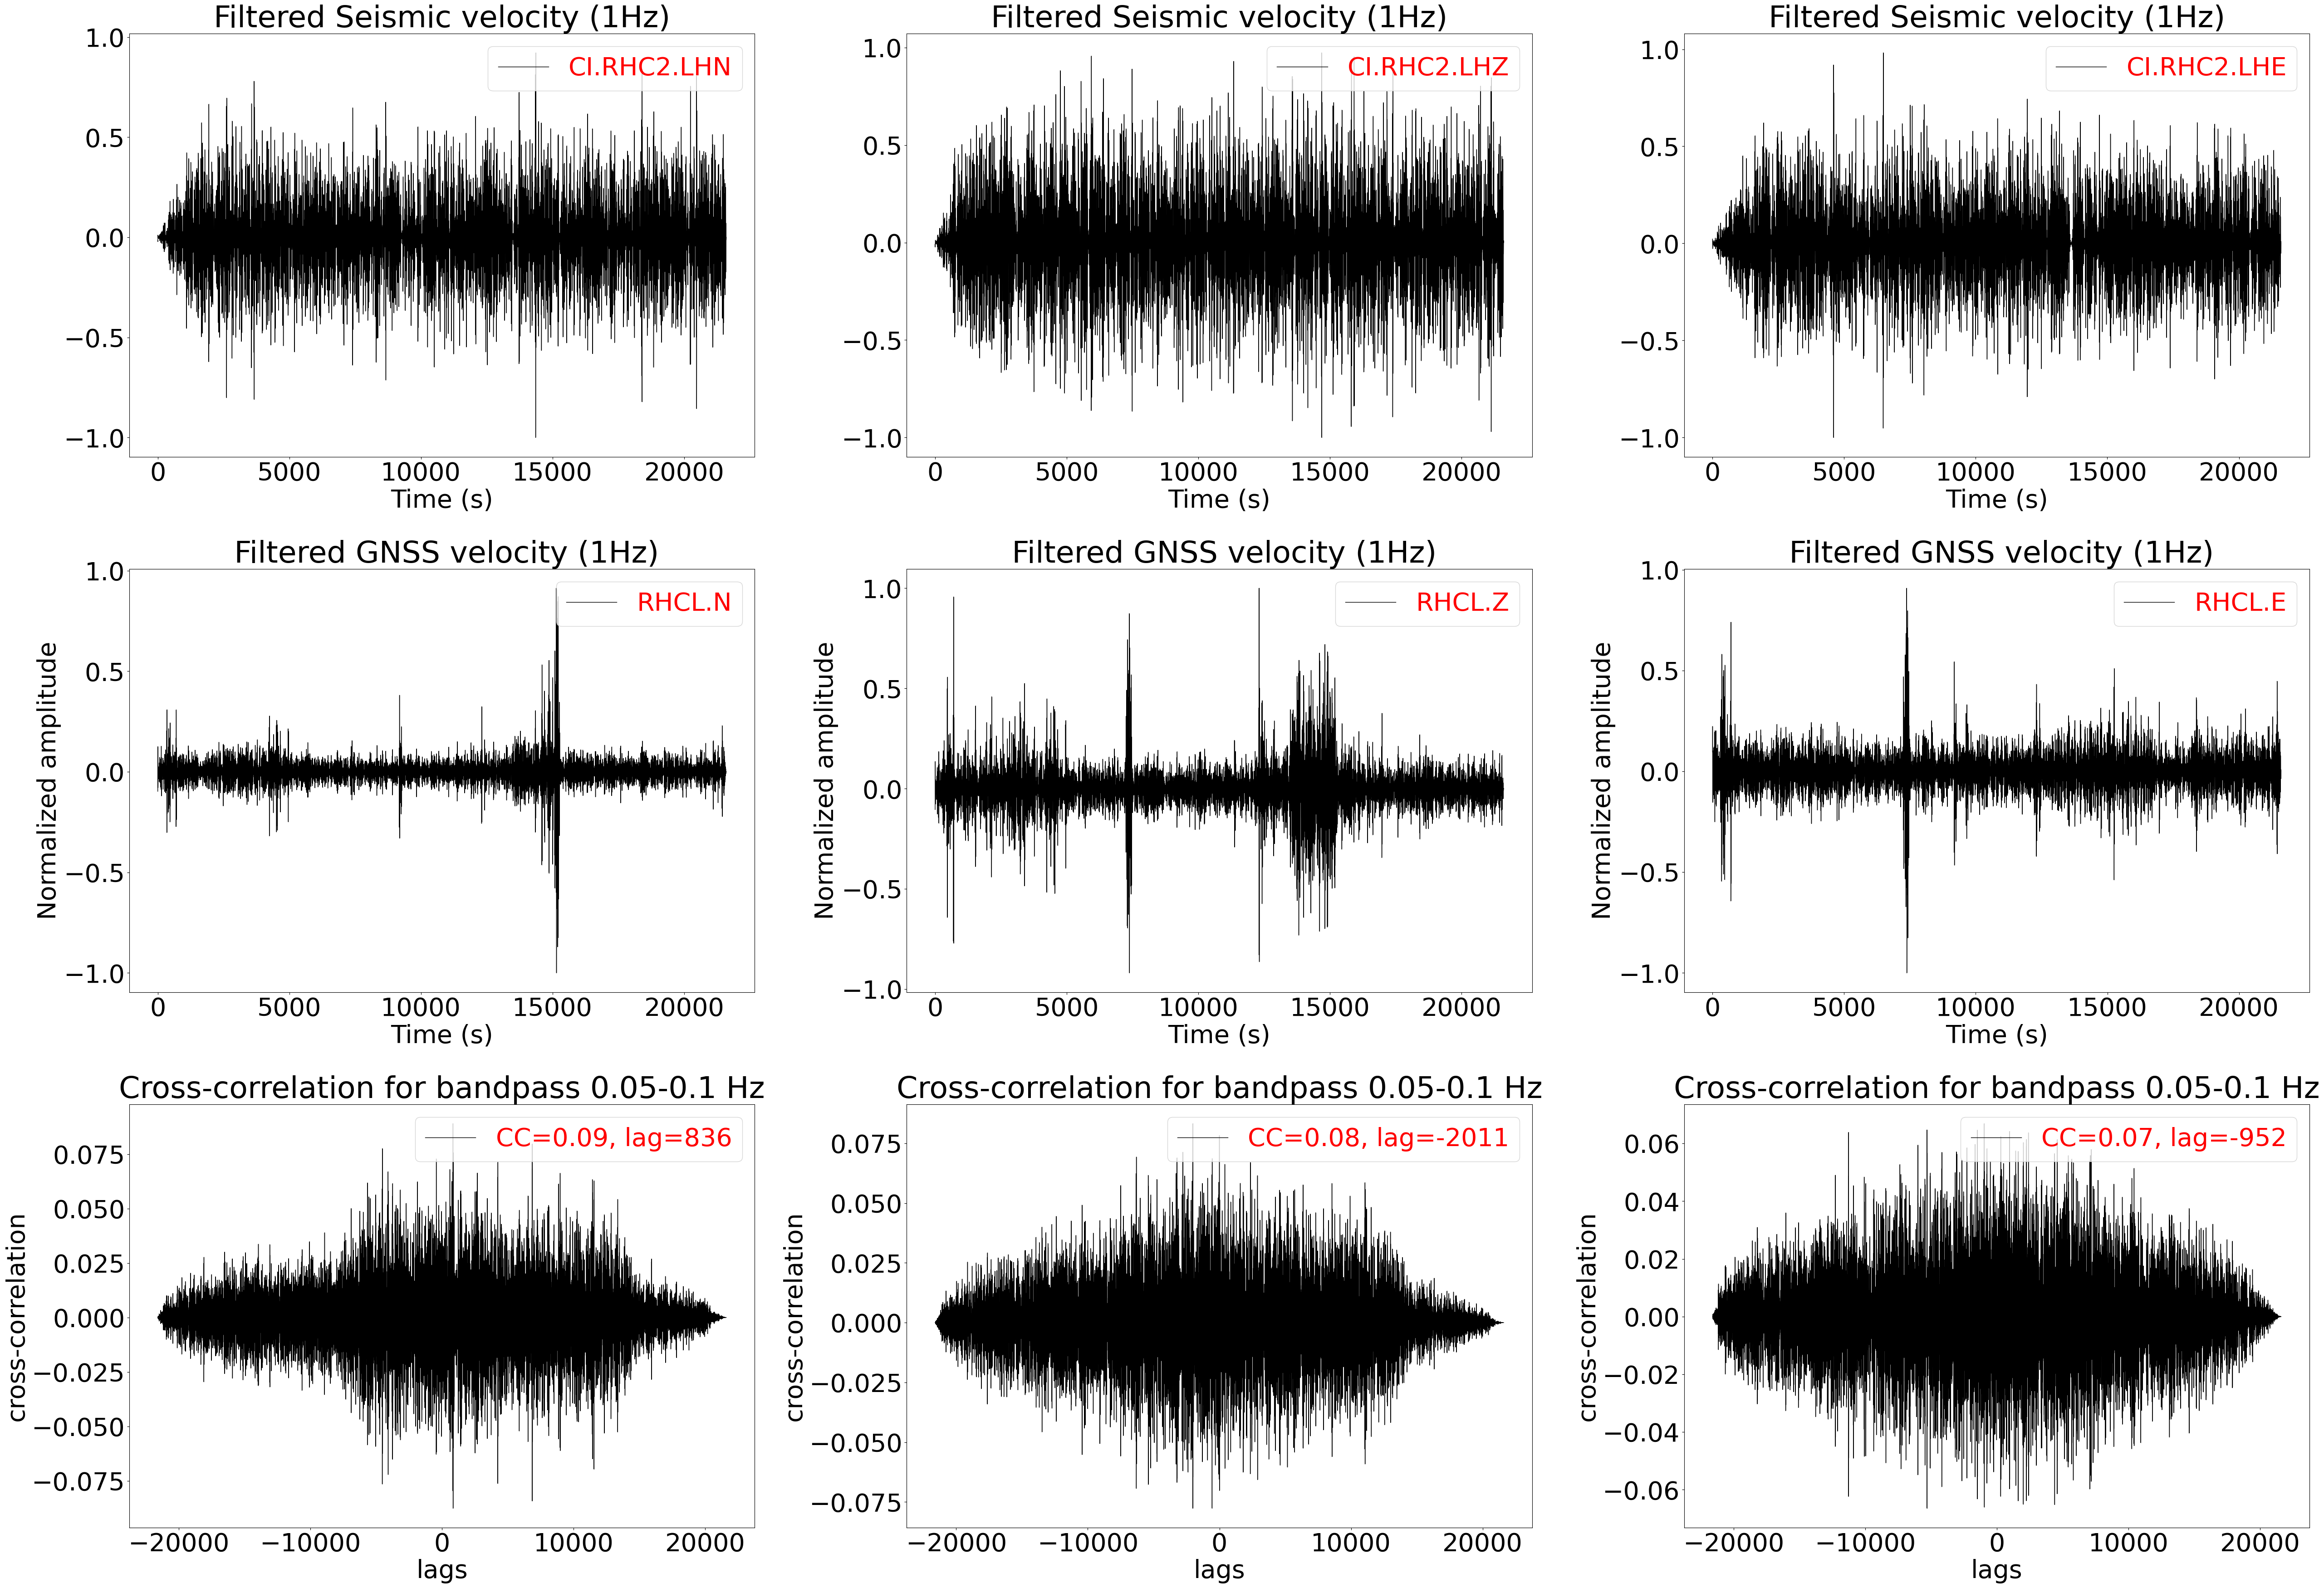

In [21]:
######## GNSS seismic cross-correlation ##################

from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

def compute_shiftn(ccn):
    zero_index = int(len(ccn) / 2) - 1
    shift = np.argmax(ccn) - zero_index 
    return shift

def compute_shiftz(ccz):
    zero_index = int(len(ccz) / 2) - 1
    shift = np.argmax(ccz) - zero_index
    return shift

def compute_shifte(cce):
    zero_index = int(len(cce) / 2) - 1
    shift = np.argmax(cce) - zero_index
    return shift

# READ INSTAVEL ASCII FILE
infile = '/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/gnss_12hr/rhcl_1hz.L2.igr.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'RHCL'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt+0, dt+21600)
st_gnss_ve[0].plot()
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.05:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.05:
        st_gnss_ve[0].data[i] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] > 0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] < -0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
#st_gnss_ve[0].taper(0.85, type="cosine")
st_gnss_ve[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH NORTH INSTAVEL DATA
st_gnss_vn = Stream(Trace())
st_gnss_vn[0].stats.network = '--'
st_gnss_vn[0].stats.station = 'RHCL'
st_gnss_vn[0].stats.channel = 'IVN'       # for [I]nst[V]el [N] component]
st_gnss_vn[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vn[0].stats.sampling_rate = 1
st_gnss_vn[0].stats.calib = 1
st_gnss_vn[0].data = site['vn']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vn[0].trim(dt+0, dt+21600)
st_gnss_vn[0].plot()
for i in range(len(st_gnss_vn[0].data)):
    if st_gnss_vn[0].data[i] > 0.08:
        st_gnss_vn[0].data[i] = 0
    if st_gnss_vn[0].data[i] < -0.08:
        st_gnss_vn[0].data[i] = 0
st_gnss_vn[0].detrend('linear')
st_gnss_vn[0].detrend('demean')
#st_gnss_vn[0].taper(0.5,type="cosine")
st_gnss_vn[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH VERTICAL INSTAVEL DATA
st_gnss_vz = Stream(Trace())
st_gnss_vz[0].stats.network = '--'
st_gnss_vz[0].stats.station = 'RHCL'
st_gnss_vz[0].stats.channel = 'IVZ'       # for [I]nst[V]el [Z] component]
st_gnss_vz[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vz[0].stats.sampling_rate = 1
st_gnss_vz[0].stats.calib = 1
st_gnss_vz[0].data = site['vz']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vz[0].trim(dt+0, dt+21600)
st_gnss_vz[0].plot()
for i in range(len(st_gnss_vz[0].data)):
    if st_gnss_vz[0].data[i] > 0.05:
        st_gnss_vz[0].data[i] = 0
    if st_gnss_vz[0].data[i] < -0.05:
        st_gnss_vz[0].data[i] = 0
st_gnss_vz[0].detrend('linear')
st_gnss_vz[0].detrend('demean')
#st_gnss_vz[0].taper(0.85,type="cosine")
st_gnss_vz[0].plot()

st_gnss_fe = st_gnss_ve[0].copy()
st_gnss_fe.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fn = st_gnss_vn[0].copy()
st_gnss_fn.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fz = st_gnss_vz[0].copy()
st_gnss_fz.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)


# LOAD SEISMIC VELOCITY E DATA
st_seis_ve = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/RHC2/LHE/CI.RHC2..LHE.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_ve[0].trim(dt+0, dt+21600)
st_seis_ve[0].plot()

# LOAD SEISMIC VELOCITY N DATA
st_seis_vn = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/RHC2/LHN/CI.RHC2..LHN.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vn[0].trim(dt+0, dt+21600)
st_seis_vn[0].plot()

# LOAD SEISMIC VELOCITY Z DATA
st_seis_vz = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/RHC2/LHZ/CI.RHC2..LHZ.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vz[0].trim(dt+0, dt+21600)
st_seis_vz[0].plot()

# TIDY UP VELOCITY TRACE
st_seis_ve[0].detrend('linear')
st_seis_ve[0].detrend('demean')
#st_seis_ve[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vn[0].detrend('linear')
st_seis_vn[0].detrend('demean')
#st_seis_vn[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vz[0].detrend('linear')
st_seis_vz[0].detrend('demean')

st_sm_fe = st_seis_ve[0].copy()
st_sm_fe.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)

st_sm_fn = st_seis_vn[0].copy()
st_sm_fn.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)

st_sm_fz = st_seis_vz[0].copy()
st_sm_fz.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)



# NORMALIZE EACH TRACE WITH ITS ABSOLUTE MAXIMUM
st_gnss_ve[0].normalize()
st_gnss_fe.normalize()
st_seis_ve[0].normalize()
st_sm_fe.normalize()
st_gnss_vn[0].normalize()
st_gnss_fn.normalize()
st_seis_vn[0].normalize()
st_sm_fn.normalize()
st_gnss_vz[0].normalize()
st_gnss_fz.normalize()
st_seis_vz[0].normalize()
st_sm_fz.normalize()

# CROSS CORRELATION
lags = np.arange(-21600, 21600)  
ccn = correlate(st_gnss_fn.data, st_sm_fn.data, 21600)
ccz = correlate(st_gnss_fz.data, st_sm_fz.data, 21600)
cce = correlate(st_gnss_fe.data, st_sm_fe.data, 21600)
print(max(ccn))
print(compute_shiftn(ccn))
print(max(ccz))
print(compute_shiftz(ccz))
print(max(cce))
print(compute_shifte(cce))

# CREATE STREAMS WITH ALL TRACES AND PLOT THEM
plt.rcParams['figure.figsize'] = [52,36]
plt.rcParams.update({'font.size': 40})
#plt.style.use('seaborn')

fig, ax = plt.subplots(3,3)

ax[0,0].plot(st_sm_fn.times(), st_sm_fn.data, 'k-', linewidth=1, label=(st_seis_vn[0].stats['network'])+'.'+(st_seis_vn[0].stats['station'])+'.'+(st_seis_vn[0].stats['channel']))
ax[0,0].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,0].set_xlabel('Time (s)')
ax[1,0].plot(st_gnss_fn.times(), st_gnss_fn.data, 'k-', linewidth=1, label=(st_gnss_vn[0].stats['station'])+'.N')
ax[1,0].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,0].set_ylabel('Normalized amplitude')
ax[1,0].set_xlabel('Time (s)')
ax[2,0].plot(lags, ccn, 'k', linewidth=1, label=('CC=%.2f' % max(ccn) +', lag=%d' % compute_shiftn(ccn))) 
ax[2,0].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,0].set_ylabel('cross-correlation')
ax[2,0].set_xlabel('lags')

ax[0,1].plot(st_sm_fz.times(), st_sm_fz.data, 'k-', linewidth=1, label=(st_seis_vz[0].stats['network'])+'.'+(st_seis_vz[0].stats['station'])+'.'+(st_seis_vz[0].stats['channel']))
ax[0,1].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,1].set_xlabel('Time (s)')
ax[1,1].plot(st_gnss_fz.times(), st_gnss_fz.data, 'k-', linewidth=1, label=(st_gnss_vz[0].stats['station'])+'.Z')
ax[1,1].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,1].set_ylabel('Normalized amplitude')
ax[1,1].set_xlabel('Time (s)')
ax[2,1].plot(lags, ccz, 'k', linewidth=1, label=('CC=%.2f' % max(ccz) +', lag=%d' % compute_shiftz(ccz)))
ax[2,1].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,1].set_ylabel('cross-correlation')
ax[2,1].set_xlabel('lags')
plt.tight_layout()

ax[0,2].plot(st_sm_fe.times(), st_sm_fe.data, 'k-', linewidth=1, label=(st_seis_ve[0].stats['network'])+'.'+(st_seis_ve[0].stats['station'])+'.'+(st_seis_ve[0].stats['channel']))
ax[0,2].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,2].set_xlabel('Time (s)')
ax[1,2].plot(st_gnss_fe.times(), st_gnss_fe.data, 'k-', linewidth=1, label=(st_gnss_ve[0].stats['station'])+'.E')
ax[1,2].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,2].set_ylabel('Normalized amplitude')
ax[1,2].set_xlabel('Time (s)')
ax[2,2].plot(lags, cce, 'k', linewidth=1, label=('CC=%.2f' % max(cce) +', lag=%d' % compute_shifte(cce)))
ax[2,2].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,2].set_ylabel('cross-correlation')
ax[2,2].set_xlabel('lags')
plt.tight_layout()

# TRACE LEGENDS
for row in ax[:,0]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,1]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,2]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend

ll = ax[1,1].legend(loc=1)
plt.setp(ll.get_texts(), color='red') #color legend

plt.show()
fig.savefig("../G-RHCL-S-RHC2.pdf")
fig.savefig("../G-RHCL-S-RHC2.png")


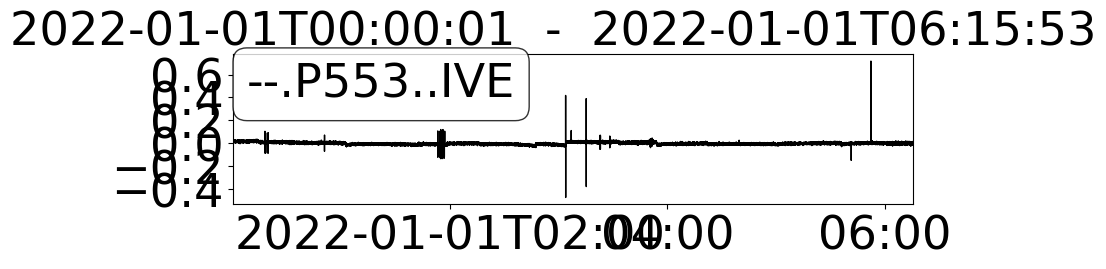

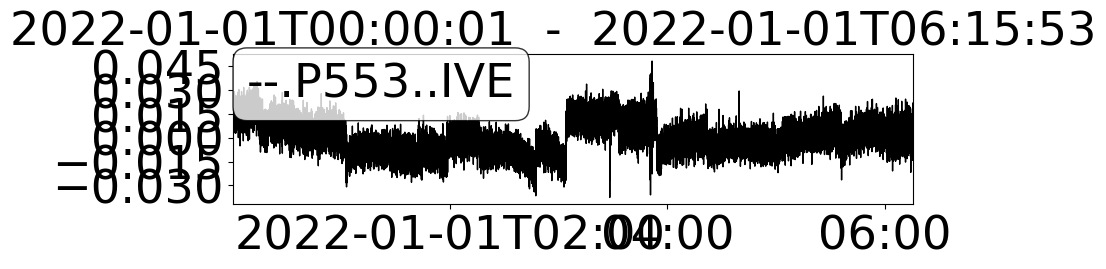

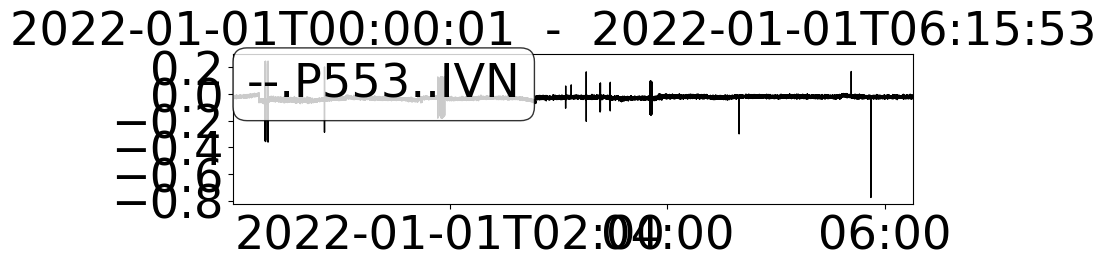

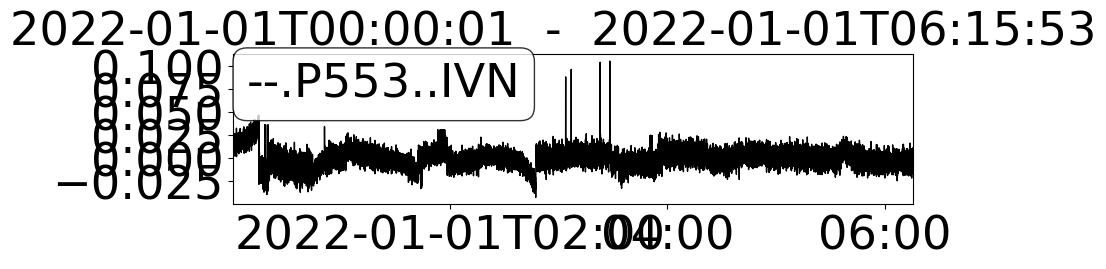

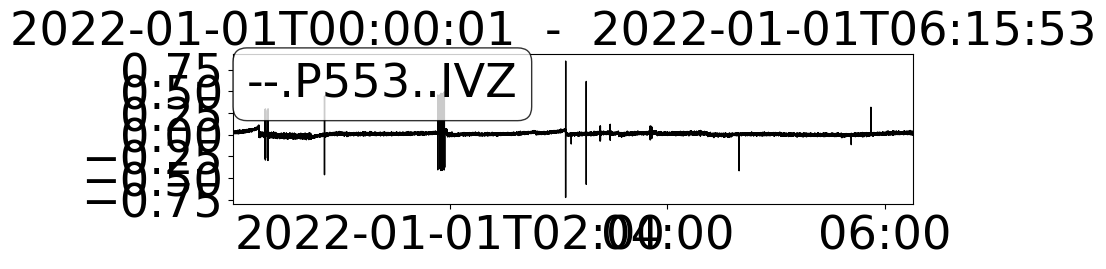

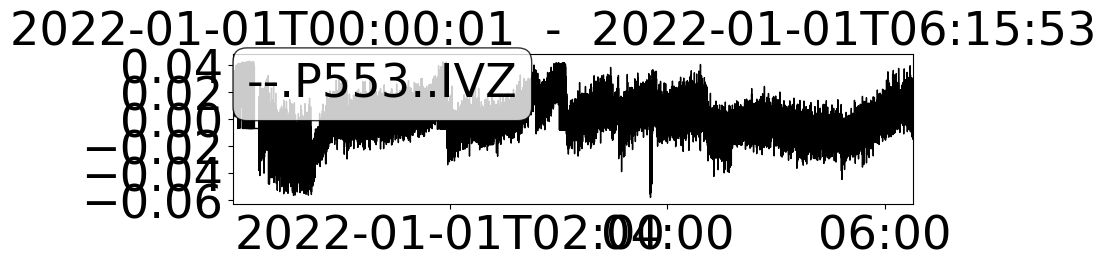

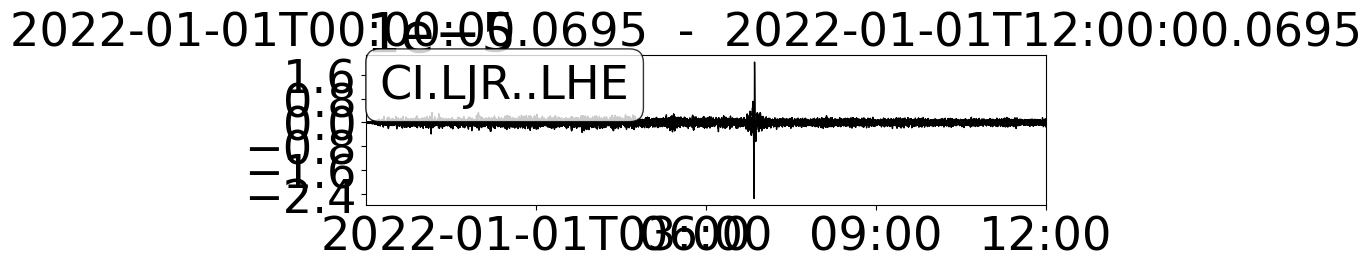

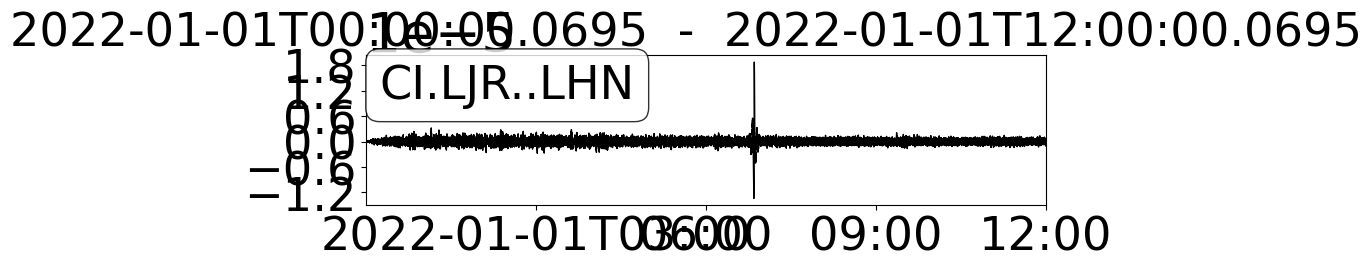

In [ ]:
######## GNSS seismic cross-correlation ##################

from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

def compute_shiftn(ccn):
    zero_index = int(len(ccn) / 2) - 1
    shift = np.argmax(ccn) - zero_index 
    return shift

def compute_shiftz(ccz):
    zero_index = int(len(ccz) / 2) - 1
    shift = np.argmax(ccz) - zero_index
    return shift

def compute_shifte(cce):
    zero_index = int(len(cce) / 2) - 1
    shift = np.argmax(cce) - zero_index
    return shift

# READ INSTAVEL ASCII FILE
infile = '/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/gnss_12hr/p553_1hz.L2.igr.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'P553'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt+0, dt+43200)
st_gnss_ve[0].plot()
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.05:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.05:
        st_gnss_ve[0].data[i] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] > 0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] < -0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
#st_gnss_ve[0].taper(0.85, type="cosine")
st_gnss_ve[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH NORTH INSTAVEL DATA
st_gnss_vn = Stream(Trace())
st_gnss_vn[0].stats.network = '--'
st_gnss_vn[0].stats.station = 'P553'
st_gnss_vn[0].stats.channel = 'IVN'       # for [I]nst[V]el [N] component]
st_gnss_vn[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vn[0].stats.sampling_rate = 1
st_gnss_vn[0].stats.calib = 1
st_gnss_vn[0].data = site['vn']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vn[0].trim(dt+0, dt+43200)
st_gnss_vn[0].plot()
for i in range(len(st_gnss_vn[0].data)):
    if st_gnss_vn[0].data[i] > 0.08:
        st_gnss_vn[0].data[i] = 0
    if st_gnss_vn[0].data[i] < -0.08:
        st_gnss_vn[0].data[i] = 0
st_gnss_vn[0].detrend('linear')
st_gnss_vn[0].detrend('demean')
#st_gnss_vn[0].taper(0.5,type="cosine")
st_gnss_vn[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH VERTICAL INSTAVEL DATA
st_gnss_vz = Stream(Trace())
st_gnss_vz[0].stats.network = '--'
st_gnss_vz[0].stats.station = 'P553'
st_gnss_vz[0].stats.channel = 'IVZ'       # for [I]nst[V]el [Z] component]
st_gnss_vz[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vz[0].stats.sampling_rate = 1
st_gnss_vz[0].stats.calib = 1
st_gnss_vz[0].data = site['vz']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vz[0].trim(dt+0, dt+43200)
st_gnss_vz[0].plot()
for i in range(len(st_gnss_vz[0].data)):
    if st_gnss_vz[0].data[i] > 0.05:
        st_gnss_vz[0].data[i] = 0
    if st_gnss_vz[0].data[i] < -0.05:
        st_gnss_vz[0].data[i] = 0
st_gnss_vz[0].detrend('linear')
st_gnss_vz[0].detrend('demean')
#st_gnss_vz[0].taper(0.85,type="cosine")
st_gnss_vz[0].plot()

st_gnss_fe = st_gnss_ve[0].copy()
st_gnss_fe.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fn = st_gnss_vn[0].copy()
st_gnss_fn.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fz = st_gnss_vz[0].copy()
st_gnss_fz.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)


# LOAD SEISMIC VELOCITY E DATA
st_seis_ve = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LJR/LHE/CI.LJR..LHE.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_ve[0].trim(dt+0, dt+43200)
st_seis_ve[0].plot()

# LOAD SEISMIC VELOCITY N DATA
st_seis_vn = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LJR/LHN/CI.LJR..LHN.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vn[0].trim(dt+0, dt+43200)
st_seis_vn[0].plot()

# LOAD SEISMIC VELOCITY Z DATA
st_seis_vz = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LJR/LHZ/CI.LJR..LHZ.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vz[0].trim(dt+0, dt+43200)
st_seis_vz[0].plot()

# TIDY UP VELOCITY TRACE
st_seis_ve[0].detrend('linear')
st_seis_ve[0].detrend('demean')
#st_seis_ve[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vn[0].detrend('linear')
st_seis_vn[0].detrend('demean')
#st_seis_vn[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vz[0].detrend('linear')
st_seis_vz[0].detrend('demean')

st_sm_fe = st_seis_ve[0].copy()
st_sm_fe.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)

st_sm_fn = st_seis_vn[0].copy()
st_sm_fn.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)

st_sm_fz = st_seis_vz[0].copy()
st_sm_fz.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)



# NORMALIZE EACH TRACE WITH ITS ABSOLUTE MAXIMUM
st_gnss_ve[0].normalize()
st_gnss_fe.normalize()
st_seis_ve[0].normalize()
st_sm_fe.normalize()
st_gnss_vn[0].normalize()
st_gnss_fn.normalize()
st_seis_vn[0].normalize()
st_sm_fn.normalize()
st_gnss_vz[0].normalize()
st_gnss_fz.normalize()
st_seis_vz[0].normalize()
st_sm_fz.normalize()

# CROSS CORRELATION
lags = np.arange(-43200, 43201)  
ccn = correlate(st_gnss_fn.data, st_sm_fn.data, 43200)
ccz = correlate(st_gnss_fz.data, st_sm_fz.data, 43200)
cce = correlate(st_gnss_fe.data, st_sm_fe.data, 43200)
print(max(ccn))
print(compute_shiftn(ccn))
print(max(ccz))
print(compute_shiftz(ccz))
print(max(cce))
print(compute_shifte(cce))

# CREATE STREAMS WITH ALL TRACES AND PLOT THEM
plt.rcParams['figure.figsize'] = [52,36]
plt.rcParams.update({'font.size': 40})
#plt.style.use('seaborn')

fig, ax = plt.subplots(3,3)

ax[0,0].plot(st_sm_fn.times(), st_sm_fn.data, 'k-', linewidth=1, label=(st_seis_vn[0].stats['network'])+'.'+(st_seis_vn[0].stats['station'])+'.'+(st_seis_vn[0].stats['channel']))
ax[0,0].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,0].set_xlabel('Time (s)')
ax[1,0].plot(st_gnss_fn.times(), st_gnss_fn.data, 'k-', linewidth=1, label=(st_gnss_vn[0].stats['station'])+'.N')
ax[1,0].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,0].set_ylabel('Normalized amplitude')
ax[1,0].set_xlabel('Time (s)')
ax[2,0].plot(lags, ccn, 'k', linewidth=1, label=('CC=%.2f' % max(ccn) +', lag=%d' % compute_shiftn(ccn))) 
ax[2,0].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,0].set_ylabel('cross-correlation')
ax[2,0].set_xlabel('lags')

ax[0,1].plot(st_sm_fz.times(), st_sm_fz.data, 'k-', linewidth=1, label=(st_seis_vz[0].stats['network'])+'.'+(st_seis_vz[0].stats['station'])+'.'+(st_seis_vz[0].stats['channel']))
ax[0,1].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,1].set_xlabel('Time (s)')
ax[1,1].plot(st_gnss_fz.times(), st_gnss_fz.data, 'k-', linewidth=1, label=(st_gnss_vz[0].stats['station'])+'.Z')
ax[1,1].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,1].set_ylabel('Normalized amplitude')
ax[1,1].set_xlabel('Time (s)')
ax[2,1].plot(lags, ccz, 'k', linewidth=1, label=('CC=%.2f' % max(ccz) +', lag=%d' % compute_shiftz(ccz)))
ax[2,1].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,1].set_ylabel('cross-correlation')
ax[2,1].set_xlabel('lags')
plt.tight_layout()

ax[0,2].plot(st_sm_fe.times(), st_sm_fe.data, 'k-', linewidth=1, label=(st_seis_ve[0].stats['network'])+'.'+(st_seis_ve[0].stats['station'])+'.'+(st_seis_ve[0].stats['channel']))
ax[0,2].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,2].set_xlabel('Time (s)')
ax[1,2].plot(st_gnss_fe.times(), st_gnss_fe.data, 'k-', linewidth=1, label=(st_gnss_ve[0].stats['station'])+'.E')
ax[1,2].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,2].set_ylabel('Normalized amplitude')
ax[1,2].set_xlabel('Time (s)')
ax[2,2].plot(lags, cce, 'k', linewidth=1, label=('CC=%.2f' % max(cce) +', lag=%d' % compute_shifte(cce)))
ax[2,2].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,2].set_ylabel('cross-correlation')
ax[2,2].set_xlabel('lags')
plt.tight_layout()

# TRACE LEGENDS
for row in ax[:,0]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,1]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,2]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend

ll = ax[1,1].legend(loc=1)
plt.setp(ll.get_texts(), color='red') #color legend

plt.show()
fig.savefig("../G-P553-S-LJR.pdf")
fig.savefig("../G-P553-S-LJR.png")


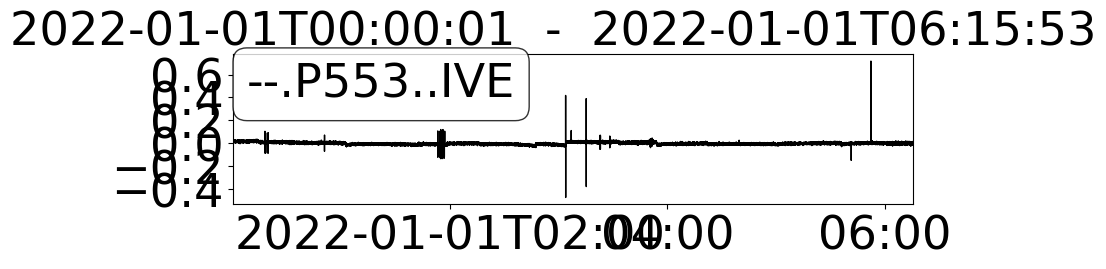

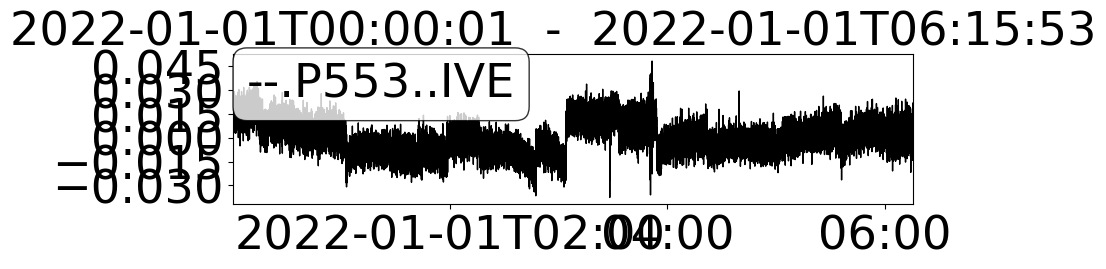

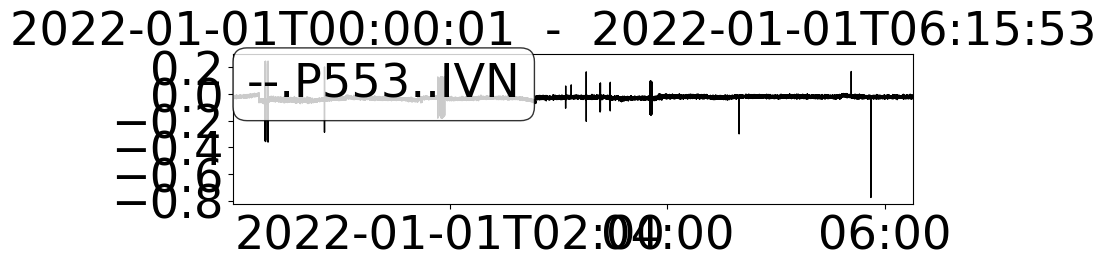

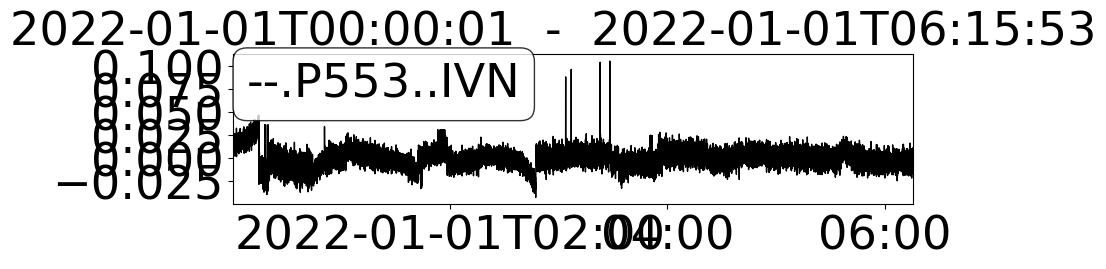

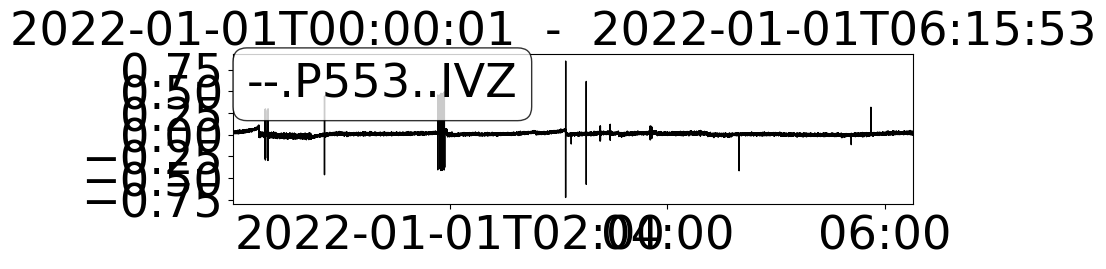

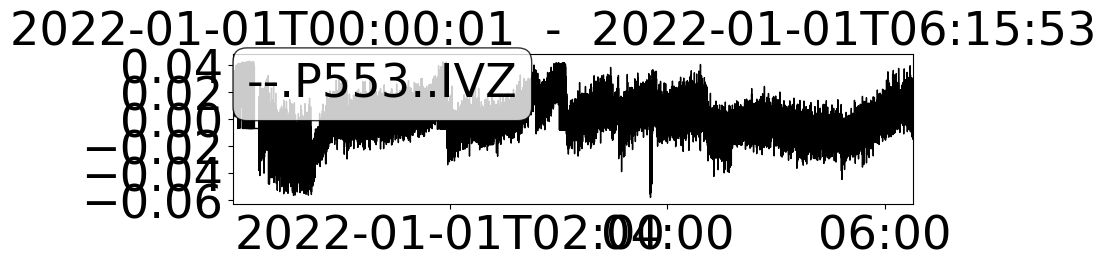

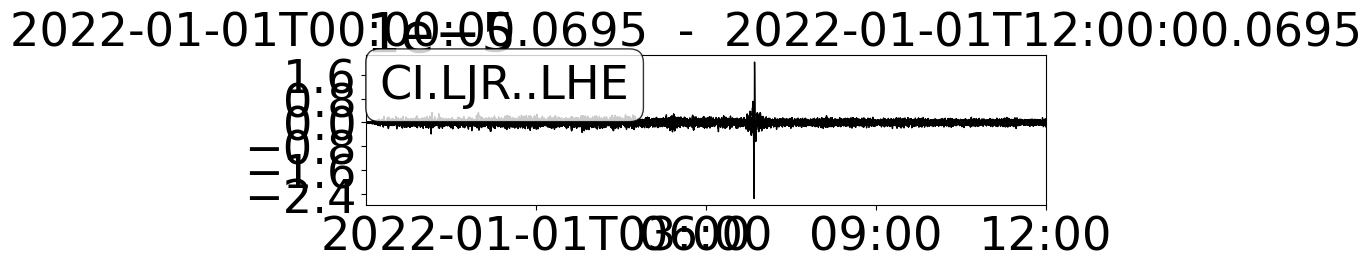

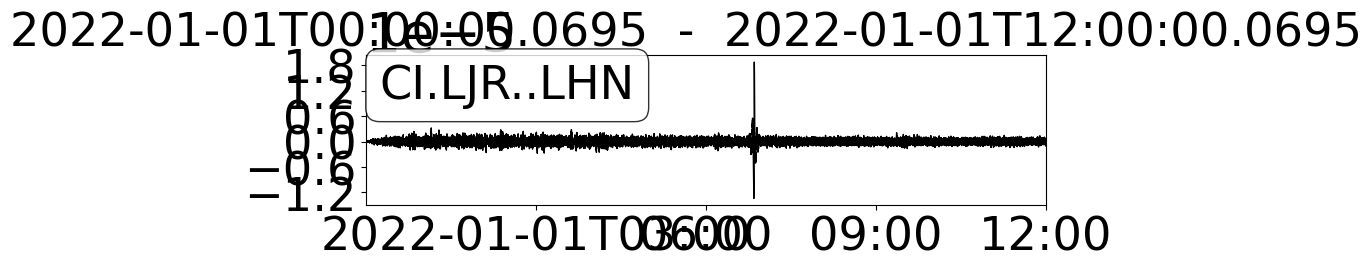

In [ ]:
######## GNSS seismic cross-correlation ##################

from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

def compute_shiftn(ccn):
    zero_index = int(len(ccn) / 2) - 1
    shift = np.argmax(ccn) - zero_index 
    return shift

def compute_shiftz(ccz):
    zero_index = int(len(ccz) / 2) - 1
    shift = np.argmax(ccz) - zero_index
    return shift

def compute_shifte(cce):
    zero_index = int(len(cce) / 2) - 1
    shift = np.argmax(cce) - zero_index
    return shift

# READ INSTAVEL ASCII FILE
infile = '/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/gnss_12hr/p553_1hz.L2.igr.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'P553'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt+0, dt+43200)
st_gnss_ve[0].plot()
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.05:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.05:
        st_gnss_ve[0].data[i] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] > 0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] < -0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
#st_gnss_ve[0].taper(0.85, type="cosine")
st_gnss_ve[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH NORTH INSTAVEL DATA
st_gnss_vn = Stream(Trace())
st_gnss_vn[0].stats.network = '--'
st_gnss_vn[0].stats.station = 'P553'
st_gnss_vn[0].stats.channel = 'IVN'       # for [I]nst[V]el [N] component]
st_gnss_vn[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vn[0].stats.sampling_rate = 1
st_gnss_vn[0].stats.calib = 1
st_gnss_vn[0].data = site['vn']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vn[0].trim(dt+0, dt+43200)
st_gnss_vn[0].plot()
for i in range(len(st_gnss_vn[0].data)):
    if st_gnss_vn[0].data[i] > 0.08:
        st_gnss_vn[0].data[i] = 0
    if st_gnss_vn[0].data[i] < -0.08:
        st_gnss_vn[0].data[i] = 0
st_gnss_vn[0].detrend('linear')
st_gnss_vn[0].detrend('demean')
#st_gnss_vn[0].taper(0.5,type="cosine")
st_gnss_vn[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH VERTICAL INSTAVEL DATA
st_gnss_vz = Stream(Trace())
st_gnss_vz[0].stats.network = '--'
st_gnss_vz[0].stats.station = 'P553'
st_gnss_vz[0].stats.channel = 'IVZ'       # for [I]nst[V]el [Z] component]
st_gnss_vz[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vz[0].stats.sampling_rate = 1
st_gnss_vz[0].stats.calib = 1
st_gnss_vz[0].data = site['vz']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vz[0].trim(dt+0, dt+43200)
st_gnss_vz[0].plot()
for i in range(len(st_gnss_vz[0].data)):
    if st_gnss_vz[0].data[i] > 0.05:
        st_gnss_vz[0].data[i] = 0
    if st_gnss_vz[0].data[i] < -0.05:
        st_gnss_vz[0].data[i] = 0
st_gnss_vz[0].detrend('linear')
st_gnss_vz[0].detrend('demean')
#st_gnss_vz[0].taper(0.85,type="cosine")
st_gnss_vz[0].plot()

st_gnss_fe = st_gnss_ve[0].copy()
st_gnss_fe.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fn = st_gnss_vn[0].copy()
st_gnss_fn.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fz = st_gnss_vz[0].copy()
st_gnss_fz.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)


# LOAD SEISMIC VELOCITY E DATA
st_seis_ve = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LJR/LHE/CI.LJR..LHE.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_ve[0].trim(dt+0, dt+43200)
st_seis_ve[0].plot()

# LOAD SEISMIC VELOCITY N DATA
st_seis_vn = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LJR/LHN/CI.LJR..LHN.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vn[0].trim(dt+0, dt+43200)
st_seis_vn[0].plot()

# LOAD SEISMIC VELOCITY Z DATA
st_seis_vz = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/LJR/LHZ/CI.LJR..LHZ.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vz[0].trim(dt+0, dt+43200)
st_seis_vz[0].plot()

# TIDY UP VELOCITY TRACE
st_seis_ve[0].detrend('linear')
st_seis_ve[0].detrend('demean')
#st_seis_ve[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vn[0].detrend('linear')
st_seis_vn[0].detrend('demean')
#st_seis_vn[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vz[0].detrend('linear')
st_seis_vz[0].detrend('demean')

st_sm_fe = st_seis_ve[0].copy()
st_sm_fe.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)

st_sm_fn = st_seis_vn[0].copy()
st_sm_fn.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)

st_sm_fz = st_seis_vz[0].copy()
st_sm_fz.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)



# NORMALIZE EACH TRACE WITH ITS ABSOLUTE MAXIMUM
st_gnss_ve[0].normalize()
st_gnss_fe.normalize()
st_seis_ve[0].normalize()
st_sm_fe.normalize()
st_gnss_vn[0].normalize()
st_gnss_fn.normalize()
st_seis_vn[0].normalize()
st_sm_fn.normalize()
st_gnss_vz[0].normalize()
st_gnss_fz.normalize()
st_seis_vz[0].normalize()
st_sm_fz.normalize()

# CROSS CORRELATION
lags = np.arange(-43200, 43201)  
ccn = correlate(st_gnss_fn.data, st_sm_fn.data, 43200)
ccz = correlate(st_gnss_fz.data, st_sm_fz.data, 43200)
cce = correlate(st_gnss_fe.data, st_sm_fe.data, 43200)
print(max(ccn))
print(compute_shiftn(ccn))
print(max(ccz))
print(compute_shiftz(ccz))
print(max(cce))
print(compute_shifte(cce))

# CREATE STREAMS WITH ALL TRACES AND PLOT THEM
plt.rcParams['figure.figsize'] = [52,36]
plt.rcParams.update({'font.size': 40})
#plt.style.use('seaborn')

fig, ax = plt.subplots(3,3)

ax[0,0].plot(st_sm_fn.times(), st_sm_fn.data, 'k-', linewidth=1, label=(st_seis_vn[0].stats['network'])+'.'+(st_seis_vn[0].stats['station'])+'.'+(st_seis_vn[0].stats['channel']))
ax[0,0].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,0].set_xlabel('Time (s)')
ax[1,0].plot(st_gnss_fn.times(), st_gnss_fn.data, 'k-', linewidth=1, label=(st_gnss_vn[0].stats['station'])+'.N')
ax[1,0].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,0].set_ylabel('Normalized amplitude')
ax[1,0].set_xlabel('Time (s)')
ax[2,0].plot(lags, ccn, 'k', linewidth=1, label=('CC=%.2f' % max(ccn) +', lag=%d' % compute_shiftn(ccn))) 
ax[2,0].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,0].set_ylabel('cross-correlation')
ax[2,0].set_xlabel('lags')

ax[0,1].plot(st_sm_fz.times(), st_sm_fz.data, 'k-', linewidth=1, label=(st_seis_vz[0].stats['network'])+'.'+(st_seis_vz[0].stats['station'])+'.'+(st_seis_vz[0].stats['channel']))
ax[0,1].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,1].set_xlabel('Time (s)')
ax[1,1].plot(st_gnss_fz.times(), st_gnss_fz.data, 'k-', linewidth=1, label=(st_gnss_vz[0].stats['station'])+'.Z')
ax[1,1].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,1].set_ylabel('Normalized amplitude')
ax[1,1].set_xlabel('Time (s)')
ax[2,1].plot(lags, ccz, 'k', linewidth=1, label=('CC=%.2f' % max(ccz) +', lag=%d' % compute_shiftz(ccz)))
ax[2,1].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,1].set_ylabel('cross-correlation')
ax[2,1].set_xlabel('lags')
plt.tight_layout()

ax[0,2].plot(st_sm_fe.times(), st_sm_fe.data, 'k-', linewidth=1, label=(st_seis_ve[0].stats['network'])+'.'+(st_seis_ve[0].stats['station'])+'.'+(st_seis_ve[0].stats['channel']))
ax[0,2].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,2].set_xlabel('Time (s)')
ax[1,2].plot(st_gnss_fe.times(), st_gnss_fe.data, 'k-', linewidth=1, label=(st_gnss_ve[0].stats['station'])+'.E')
ax[1,2].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,2].set_ylabel('Normalized amplitude')
ax[1,2].set_xlabel('Time (s)')
ax[2,2].plot(lags, cce, 'k', linewidth=1, label=('CC=%.2f' % max(cce) +', lag=%d' % compute_shifte(cce)))
ax[2,2].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,2].set_ylabel('cross-correlation')
ax[2,2].set_xlabel('lags')
plt.tight_layout()

# TRACE LEGENDS
for row in ax[:,0]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,1]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,2]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend

ll = ax[1,1].legend(loc=1)
plt.setp(ll.get_texts(), color='red') #color legend

plt.show()
fig.savefig("../G-P553-S-LJR.pdf")
fig.savefig("../G-P553-S-LJR.png")


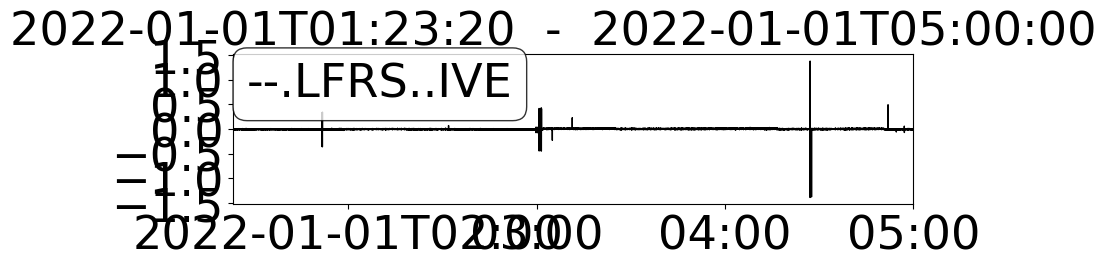

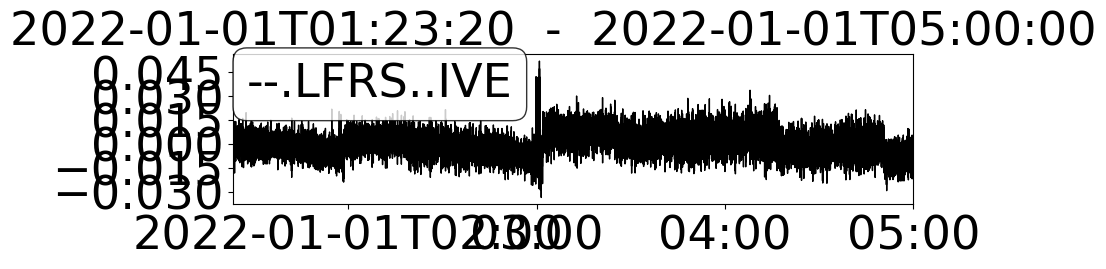

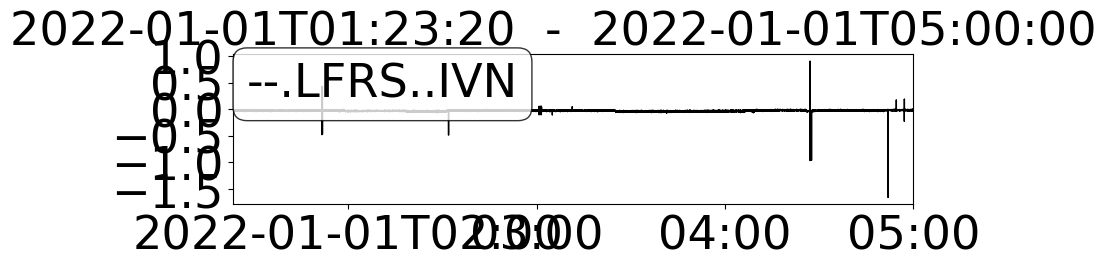

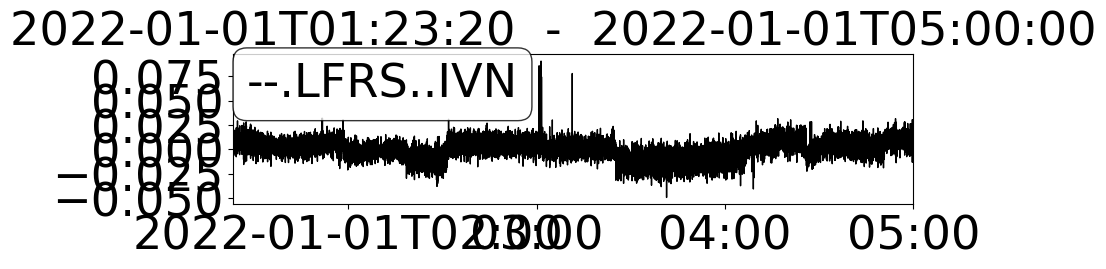

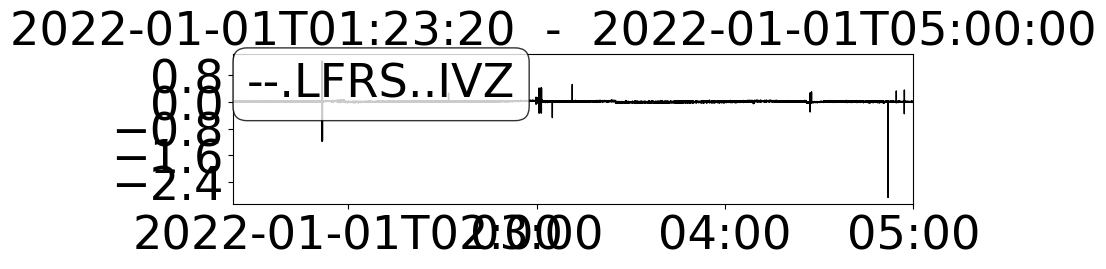

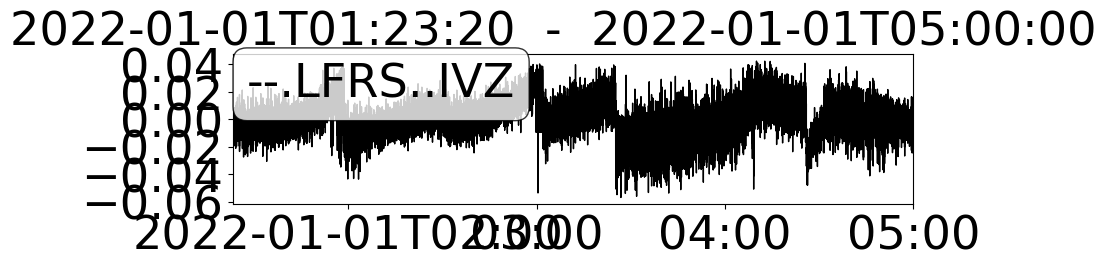

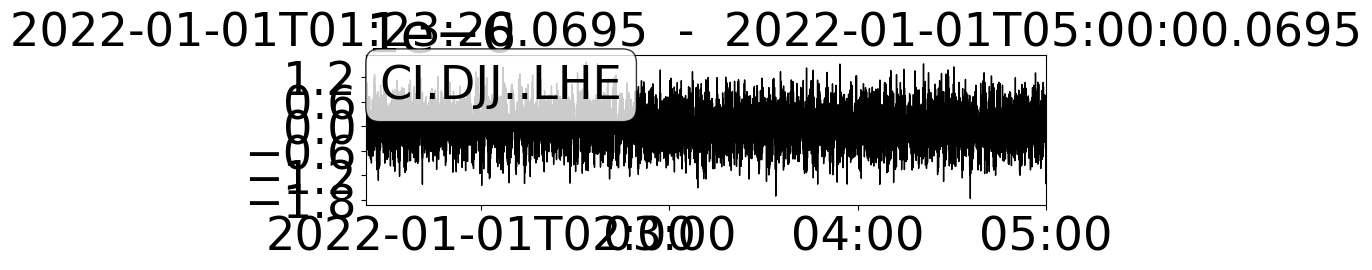

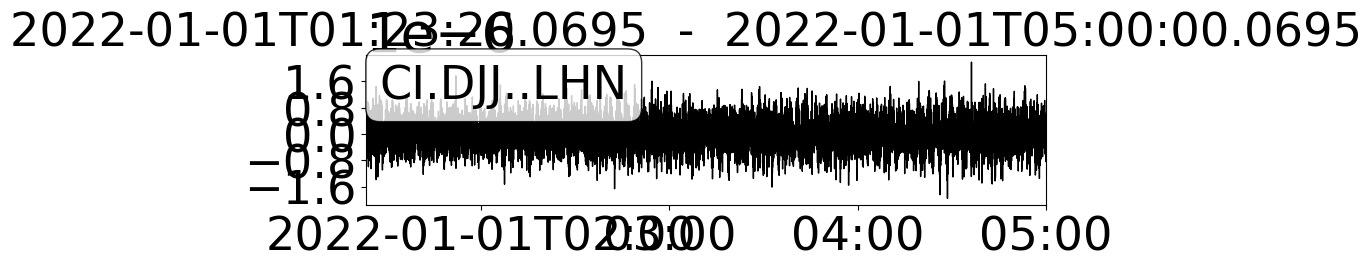

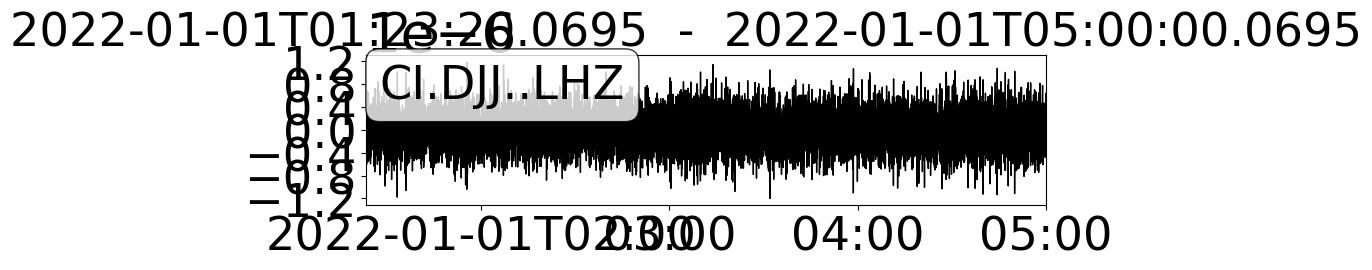

0.09133006692313056
1426
0.09475192510674416
-428
0.09267600264450306
885


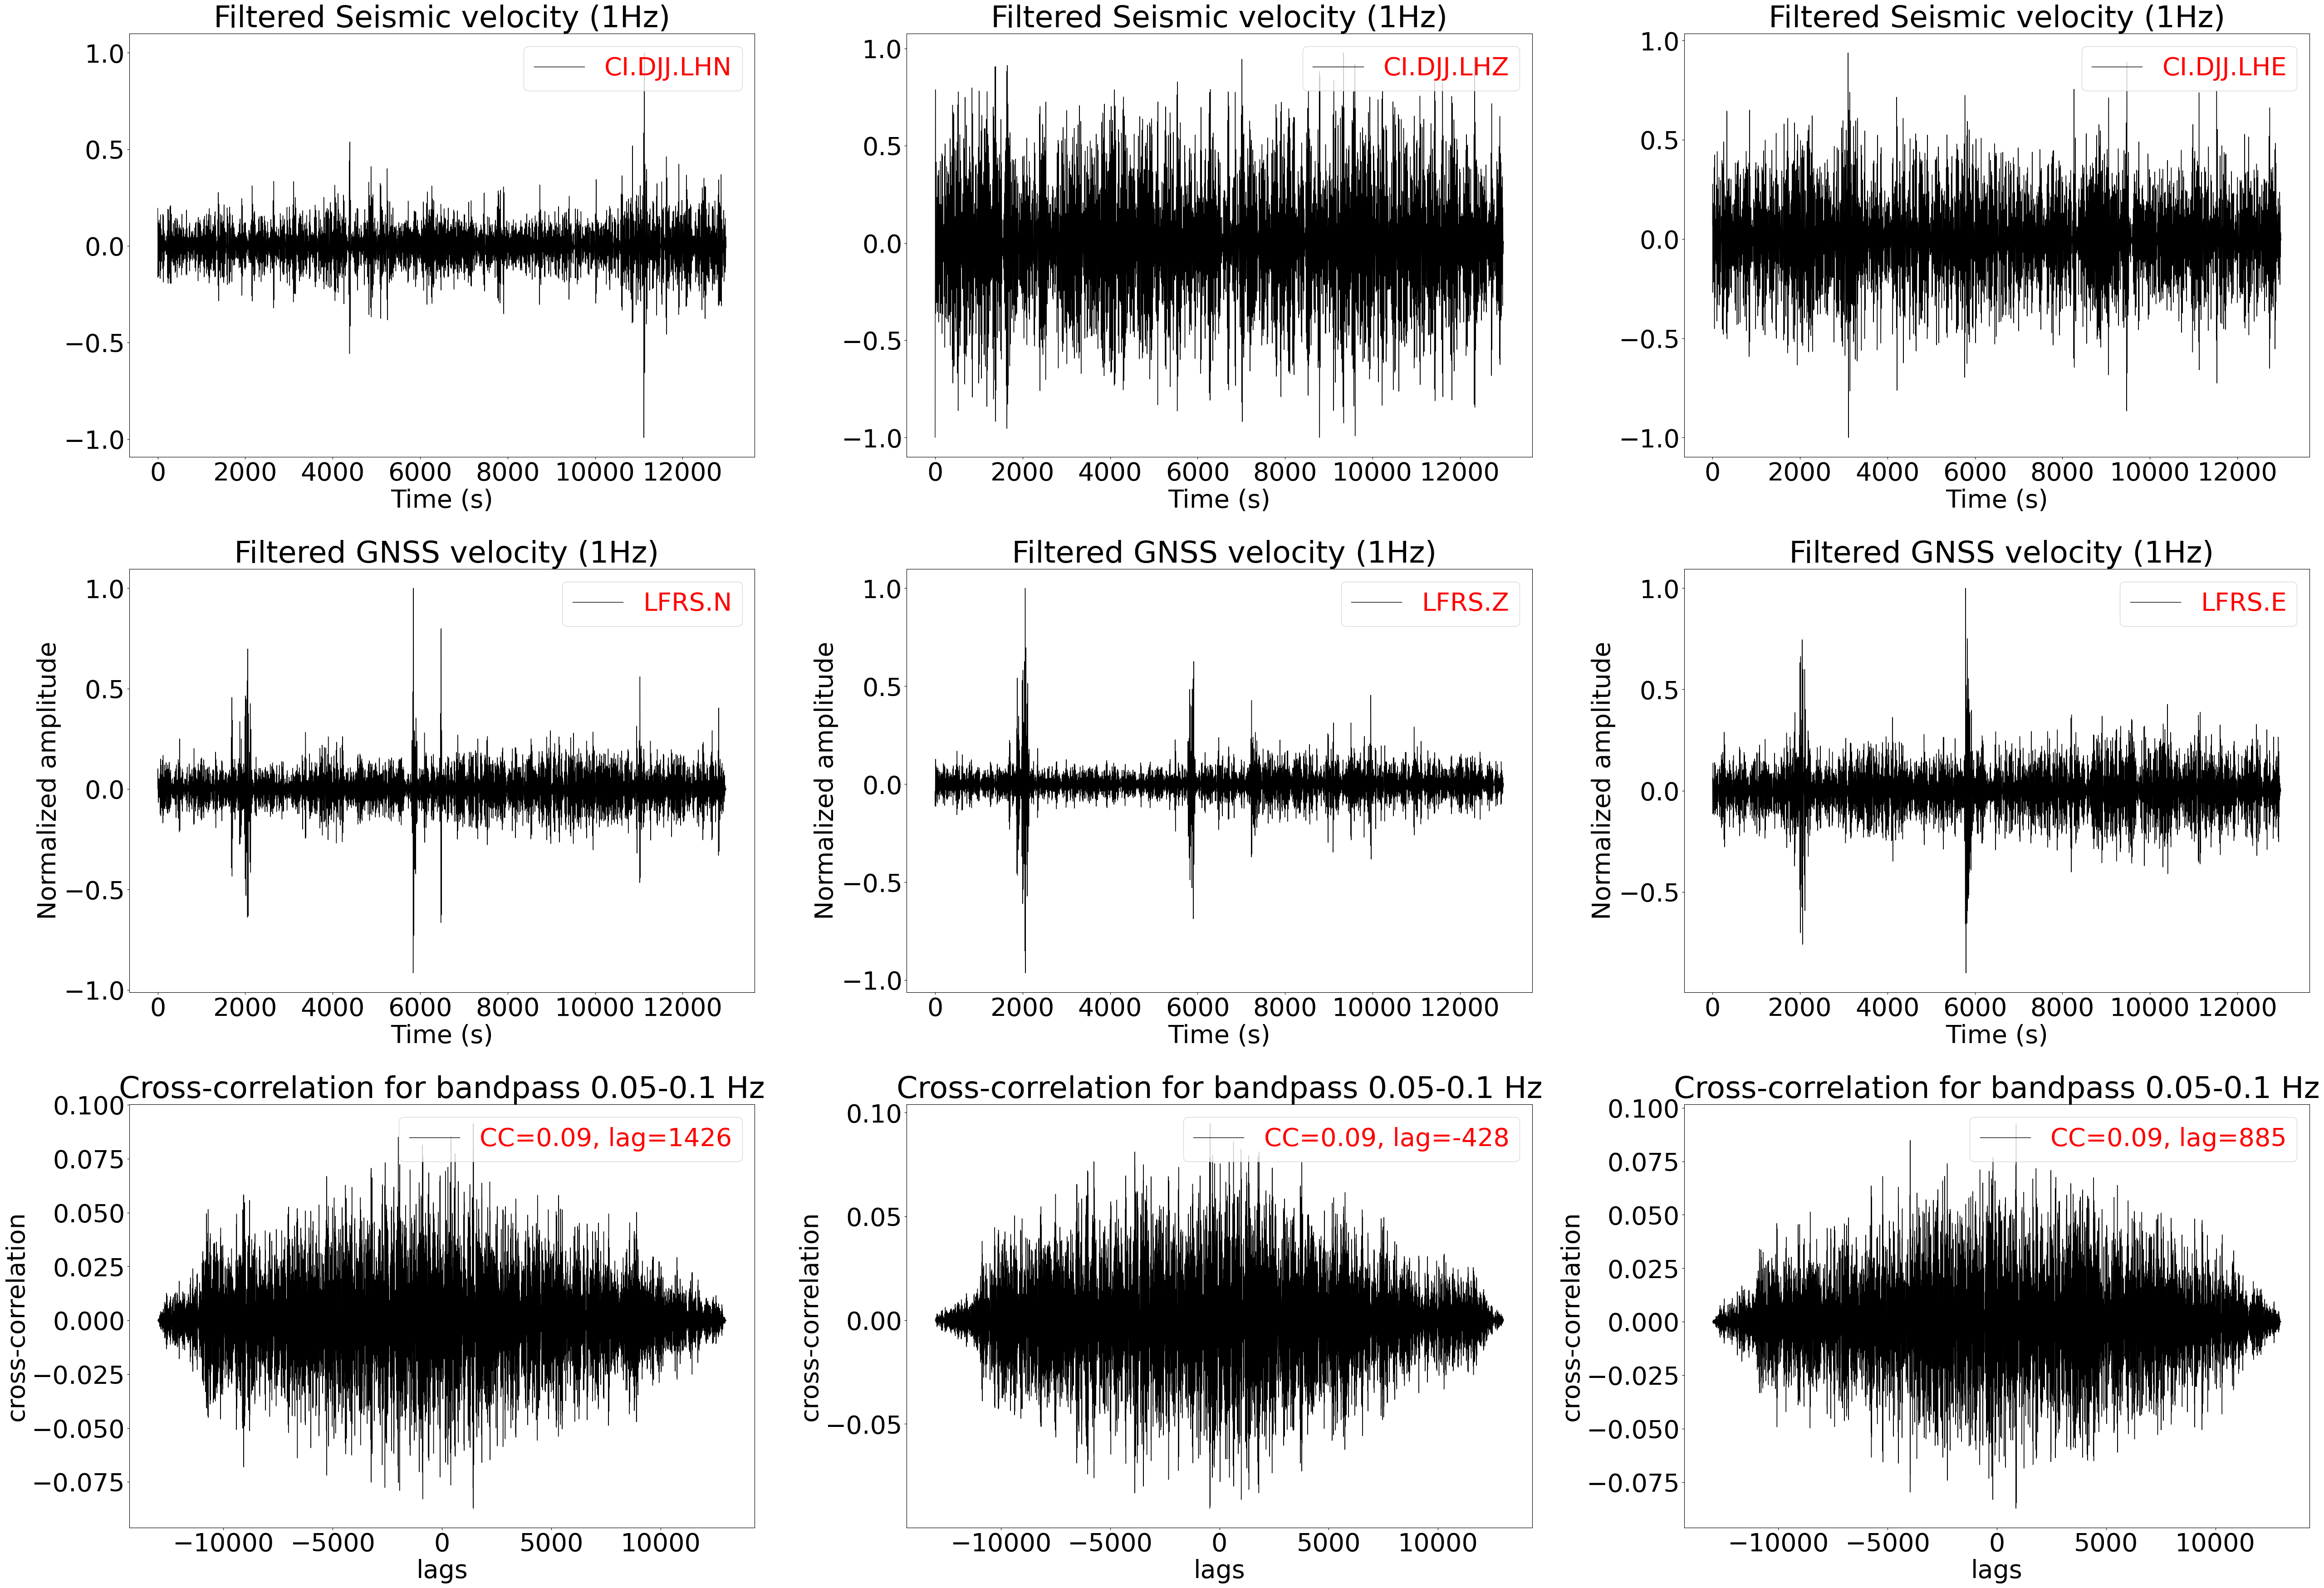

In [10]:
######## GNSS seismic cross-correlation ##################

from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime

def compute_shiftn(ccn):
    zero_index = int(len(ccn) / 2) - 1
    shift = np.argmax(ccn) - zero_index 
    return shift

def compute_shiftz(ccz):
    zero_index = int(len(ccz) / 2) - 1
    shift = np.argmax(ccz) - zero_index
    return shift

def compute_shifte(cce):
    zero_index = int(len(cce) / 2) - 1
    shift = np.argmax(cce) - zero_index
    return shift

# READ INSTAVEL ASCII FILE
infile = '/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/gnss_12hr/lfrs_1hz.L2.igr.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'LFRS'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt+5000, dt+18000)
st_gnss_ve[0].plot()
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.05:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.05:
        st_gnss_ve[0].data[i] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] > 0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] < -0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
#st_gnss_ve[0].taper(0.85, type="cosine")
st_gnss_ve[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH NORTH INSTAVEL DATA
st_gnss_vn = Stream(Trace())
st_gnss_vn[0].stats.network = '--'
st_gnss_vn[0].stats.station = 'LFRS'
st_gnss_vn[0].stats.channel = 'IVN'       # for [I]nst[V]el [N] component]
st_gnss_vn[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vn[0].stats.sampling_rate = 1
st_gnss_vn[0].stats.calib = 1
st_gnss_vn[0].data = site['vn']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vn[0].trim(dt+5000, dt+18000)
st_gnss_vn[0].plot()
for i in range(len(st_gnss_vn[0].data)):
    if st_gnss_vn[0].data[i] > 0.08:
        st_gnss_vn[0].data[i] = 0
    if st_gnss_vn[0].data[i] < -0.08:
        st_gnss_vn[0].data[i] = 0
st_gnss_vn[0].detrend('linear')
st_gnss_vn[0].detrend('demean')
#st_gnss_vn[0].taper(0.5,type="cosine")
st_gnss_vn[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH VERTICAL INSTAVEL DATA
st_gnss_vz = Stream(Trace())
st_gnss_vz[0].stats.network = '--'
st_gnss_vz[0].stats.station = 'LFRS'
st_gnss_vz[0].stats.channel = 'IVZ'       # for [I]nst[V]el [Z] component]
st_gnss_vz[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vz[0].stats.sampling_rate = 1
st_gnss_vz[0].stats.calib = 1
st_gnss_vz[0].data = site['vz']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vz[0].trim(dt+5000, dt+18000)
st_gnss_vz[0].plot()
for i in range(len(st_gnss_vz[0].data)):
    if st_gnss_vz[0].data[i] > 0.05:
        st_gnss_vz[0].data[i] = 0
    if st_gnss_vz[0].data[i] < -0.05:
        st_gnss_vz[0].data[i] = 0
st_gnss_vz[0].detrend('linear')
st_gnss_vz[0].detrend('demean')
#st_gnss_vz[0].taper(0.85,type="cosine")
st_gnss_vz[0].plot()

st_gnss_fe = st_gnss_ve[0].copy()
st_gnss_fe.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fn = st_gnss_vn[0].copy()
st_gnss_fn.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)
st_gnss_fz = st_gnss_vz[0].copy()
st_gnss_fz.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)


# LOAD SEISMIC VELOCITY E DATA
st_seis_ve = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/DJJ/LHE/CI.DJJ..LHE.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_ve[0].trim(dt+5000, dt+18000)
st_seis_ve[0].plot()

# LOAD SEISMIC VELOCITY N DATA
st_seis_vn = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/DJJ/LHN/CI.DJJ..LHN.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vn[0].trim(dt+5000, dt+18000)
st_seis_vn[0].plot()

# LOAD SEISMIC VELOCITY Z DATA
st_seis_vz = read("/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/data/2022/DJJ/LHZ/CI.DJJ..LHZ.2022.01.mseed")
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_seis_vz[0].trim(dt+5000, dt+18000)
st_seis_vz[0].plot()

# TIDY UP VELOCITY TRACE
st_seis_ve[0].detrend('linear')
st_seis_ve[0].detrend('demean')
#st_seis_ve[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vn[0].detrend('linear')
st_seis_vn[0].detrend('demean')
#st_seis_vn[0].taper(0.85,type="cosine")

# TIDY UP VELOCITY TRACE
st_seis_vz[0].detrend('linear')
st_seis_vz[0].detrend('demean')

st_sm_fe = st_seis_ve[0].copy()
st_sm_fe.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)

st_sm_fn = st_seis_vn[0].copy()
st_sm_fn.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)

st_sm_fz = st_seis_vz[0].copy()
st_sm_fz.filter('bandpass', freqmin=0.05, freqmax=0.1, corners=4, zerophase=True)



# NORMALIZE EACH TRACE WITH ITS ABSOLUTE MAXIMUM
st_gnss_ve[0].normalize()
st_gnss_fe.normalize()
st_seis_ve[0].normalize()
st_sm_fe.normalize()
st_gnss_vn[0].normalize()
st_gnss_fn.normalize()
st_seis_vn[0].normalize()
st_sm_fn.normalize()
st_gnss_vz[0].normalize()
st_gnss_fz.normalize()
st_seis_vz[0].normalize()
st_sm_fz.normalize()

# CROSS CORRELATION
lags = np.arange(-13000, 13001)  
ccn = correlate(st_gnss_fn.data, st_sm_fn.data, 13000)
ccz = correlate(st_gnss_fz.data, st_sm_fz.data, 13000)
cce = correlate(st_gnss_fe.data, st_sm_fe.data, 13000)
print(max(ccn))
print(compute_shiftn(ccn))
print(max(ccz))
print(compute_shiftz(ccz))
print(max(cce))
print(compute_shifte(cce))

# CREATE STREAMS WITH ALL TRACES AND PLOT THEM
plt.rcParams['figure.figsize'] = [52,36]
plt.rcParams.update({'font.size': 40})
#plt.style.use('seaborn')

fig, ax = plt.subplots(3,3)

ax[0,0].plot(st_sm_fn.times(), st_sm_fn.data, 'k-', linewidth=1, label=(st_seis_vn[0].stats['network'])+'.'+(st_seis_vn[0].stats['station'])+'.'+(st_seis_vn[0].stats['channel']))
ax[0,0].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,0].set_xlabel('Time (s)')
ax[1,0].plot(st_gnss_fn.times(), st_gnss_fn.data, 'k-', linewidth=1, label=(st_gnss_vn[0].stats['station'])+'.N')
ax[1,0].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,0].set_ylabel('Normalized amplitude')
ax[1,0].set_xlabel('Time (s)')
ax[2,0].plot(lags, ccn, 'k', linewidth=1, label=('CC=%.2f' % max(ccn) +', lag=%d' % compute_shiftn(ccn))) 
ax[2,0].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,0].set_ylabel('cross-correlation')
ax[2,0].set_xlabel('lags')

ax[0,1].plot(st_sm_fz.times(), st_sm_fz.data, 'k-', linewidth=1, label=(st_seis_vz[0].stats['network'])+'.'+(st_seis_vz[0].stats['station'])+'.'+(st_seis_vz[0].stats['channel']))
ax[0,1].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,1].set_xlabel('Time (s)')
ax[1,1].plot(st_gnss_fz.times(), st_gnss_fz.data, 'k-', linewidth=1, label=(st_gnss_vz[0].stats['station'])+'.Z')
ax[1,1].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,1].set_ylabel('Normalized amplitude')
ax[1,1].set_xlabel('Time (s)')
ax[2,1].plot(lags, ccz, 'k', linewidth=1, label=('CC=%.2f' % max(ccz) +', lag=%d' % compute_shiftz(ccz)))
ax[2,1].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,1].set_ylabel('cross-correlation')
ax[2,1].set_xlabel('lags')
plt.tight_layout()

ax[0,2].plot(st_sm_fe.times(), st_sm_fe.data, 'k-', linewidth=1, label=(st_seis_ve[0].stats['network'])+'.'+(st_seis_ve[0].stats['station'])+'.'+(st_seis_ve[0].stats['channel']))
ax[0,2].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,2].set_xlabel('Time (s)')
ax[1,2].plot(st_gnss_fe.times(), st_gnss_fe.data, 'k-', linewidth=1, label=(st_gnss_ve[0].stats['station'])+'.E')
ax[1,2].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,2].set_ylabel('Normalized amplitude')
ax[1,2].set_xlabel('Time (s)')
ax[2,2].plot(lags, cce, 'k', linewidth=1, label=('CC=%.2f' % max(cce) +', lag=%d' % compute_shifte(cce)))
ax[2,2].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,2].set_ylabel('cross-correlation')
ax[2,2].set_xlabel('lags')
plt.tight_layout()

# TRACE LEGENDS
for row in ax[:,0]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,1]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,2]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend

ll = ax[1,1].legend(loc=1)
plt.setp(ll.get_texts(), color='red') #color legend

plt.show()
fig.savefig("../G-LFRS-S-DJJ.pdf")
fig.savefig("../G-LFRS-S-DJJ.png")
